In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# there are no missing values in data

In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
def multiple_plot(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(feature)
    plt.title(f'{feature.name} histogram plot')
    
    
    plt.subplot(1,2,2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} boxplot')
    
    plt.show()

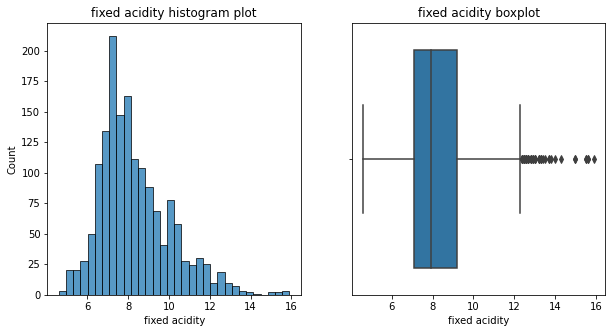

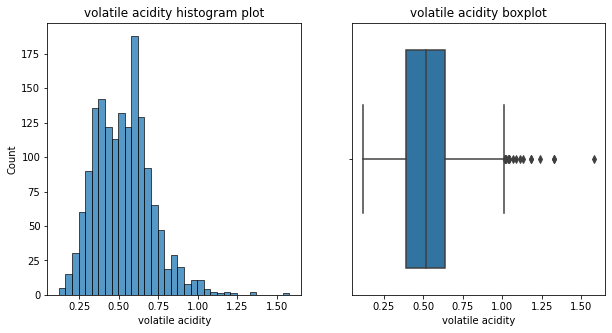

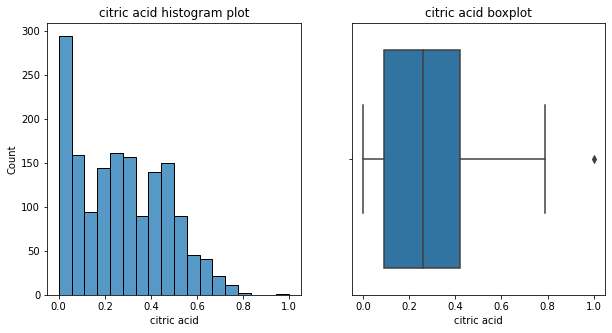

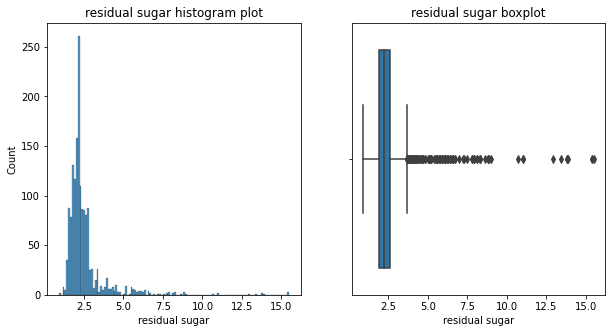

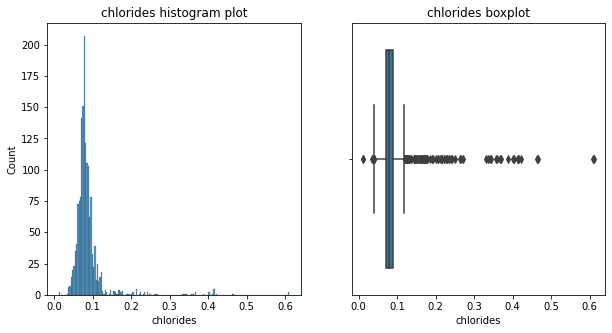

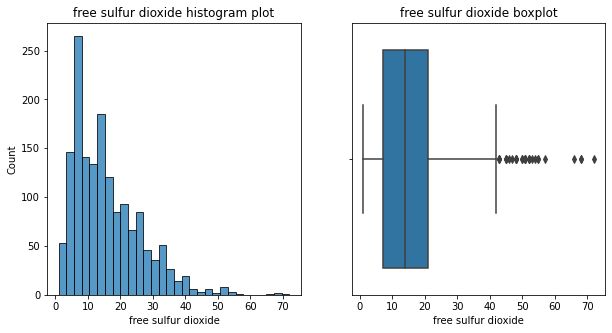

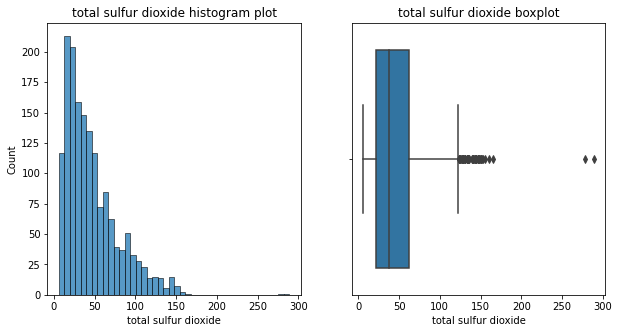

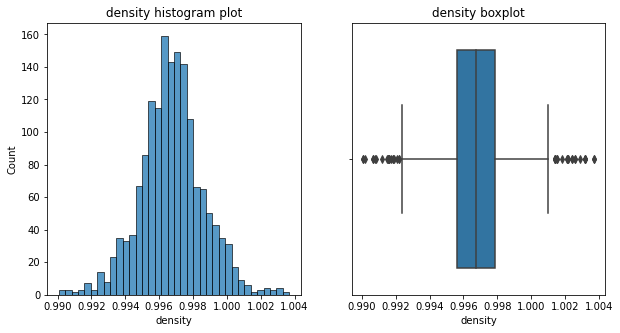

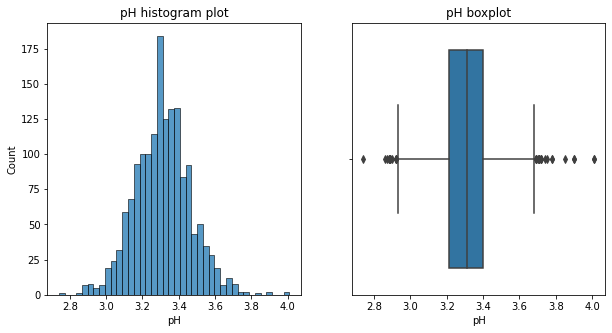

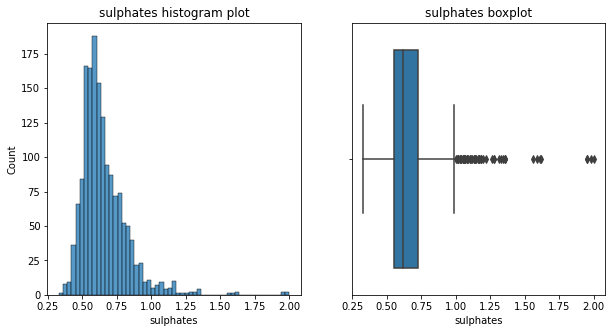

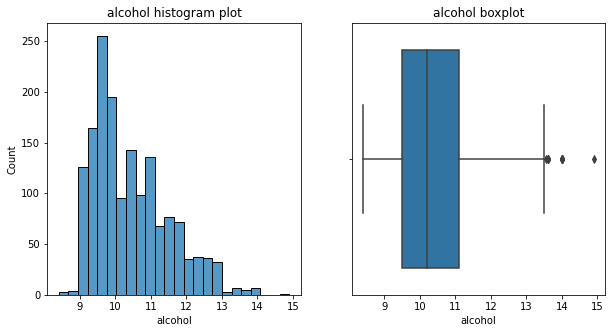

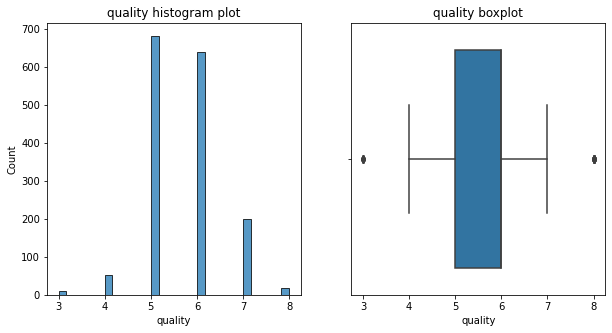

In [11]:
for i in data.columns:
    multiple_plot(data[i])

In [12]:
# From above diagram we can see that few columns are skewed and outliers are there

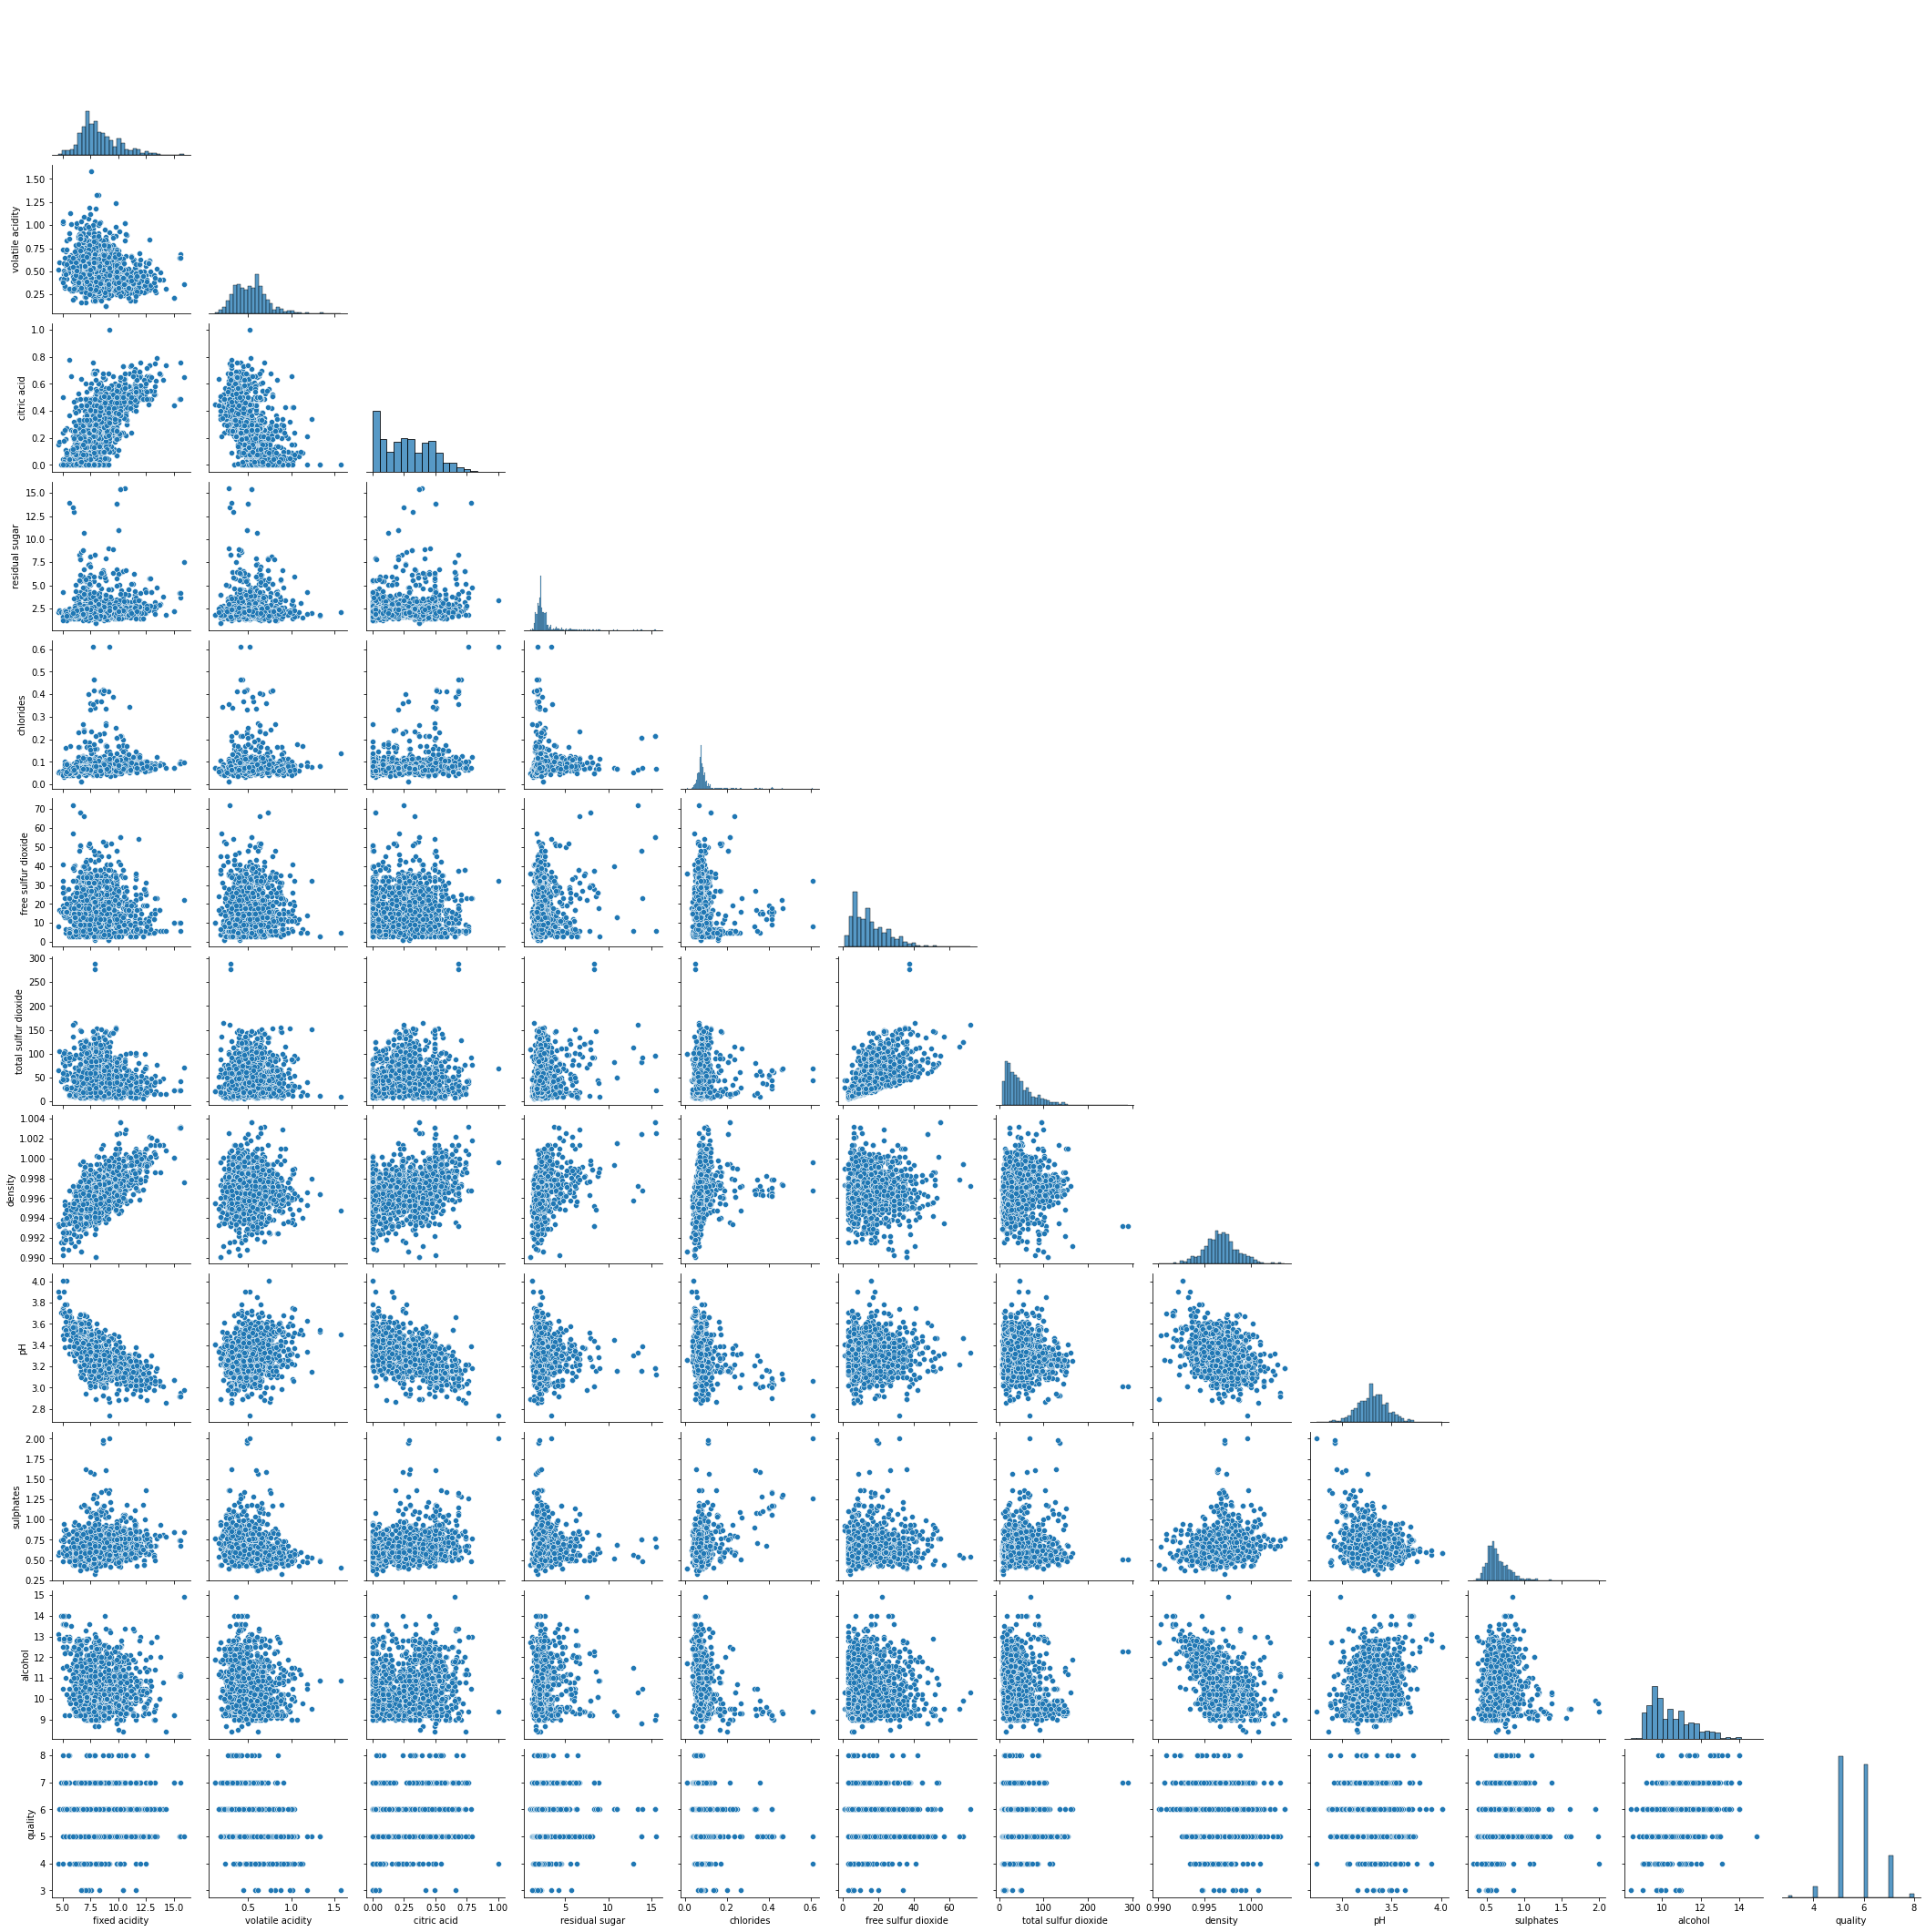

In [13]:
sns.pairplot(data,corner=True)

<AxesSubplot:>

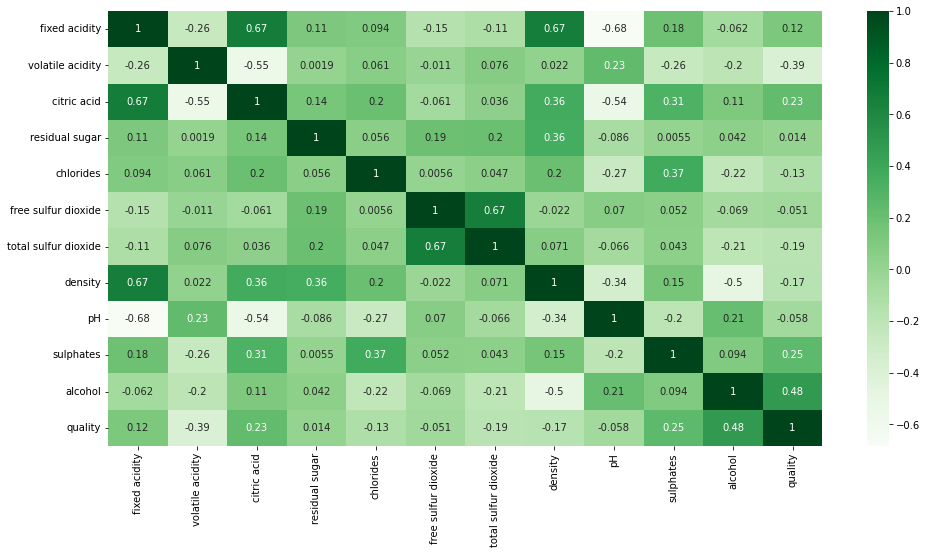

In [14]:
corr=data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,cmap='Greens')

In [15]:
X=data.drop('quality',axis=1)
Y=data['quality']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
y_train

493     6
354     6
342     6
834     5
705     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1279, dtype: int64

In [19]:
pipe_LR=Pipeline([('Scaler1',StandardScaler()),
                 ('LR_model',LogisticRegression())])
pipe_DT=Pipeline([('Scaler2',StandardScaler()),
                 ('DT_model',DecisionTreeClassifier())])
pipe_RF=Pipeline([('Scaler3',StandardScaler()),
                 ('RF_model',RandomForestClassifier())])
#pipe_XG=Pipeline([('Scaler4',StandardScaler()),
                # ('XGB_model',XGBClassifier())])


In [20]:
pipeline=[pipe_LR,pipe_DT,pipe_RF]
pipe_dict={0:'LR_model',1:'DT_model',2:'RF_model'}

In [21]:
for pipe in pipeline:
    pipe.fit(X_train,y_train)

In [22]:
for i,models in enumerate(pipeline):
    print('{} Train Accuracy {}'.format(pipe_dict[i],models.score(X_train,y_train)))
    print('{} Test Accuracy {}'.format(pipe_dict[i],models.score(X_test,y_test)))

LR_model Train Accuracy 0.619233776387803
LR_model Test Accuracy 0.575
DT_model Train Accuracy 1.0
DT_model Test Accuracy 0.584375
RF_model Train Accuracy 1.0
RF_model Test Accuracy 0.675


In [23]:
# Decision Tree and RandomForest are overfitted . We will try Adaboost and KNeighbors classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
pipe_Ada=Pipeline([('Scaler4',StandardScaler()),
                 ('Ad_model',AdaBoostClassifier())])
pipe_KN=Pipeline([('Scaler5',StandardScaler()),
                 ('KN_model',KNeighborsClassifier())])

In [26]:
pipeline2=[pipe_Ada,pipe_KN]
pipe_dict={0:'Ad_model',1:'KN_model'}

In [27]:
for pipe in pipeline2:
    pipe.fit(X_train,y_train)

In [28]:
for i,models in enumerate(pipeline2):
    print('{} Train Accuracy {}'.format(pipe_dict[i],models.score(X_train,y_train)))
    print('{} Test Accuracy {}'.format(pipe_dict[i],models.score(X_test,y_test)))

Ad_model Train Accuracy 0.5582486317435497
Ad_model Test Accuracy 0.528125
KN_model Train Accuracy 0.7177482408131353
KN_model Test Accuracy 0.546875


In [29]:
# Models are overfitting may be because data is imbalance one

In [30]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [31]:
# we will balance the data using SMOTE and then check the accuarcy of each model

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
oversample=SMOTE()
X,y=oversample.fit_resample(X,Y)

In [34]:
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3268, 11), (818, 11), (3268,), (818,))

In [37]:
pipe_LR=Pipeline([('Scaler1',StandardScaler()),
                 ('LR_model',LogisticRegression())])
pipe_DT=Pipeline([('Scaler2',StandardScaler()),
                 ('DT_model',DecisionTreeClassifier())])
pipe_RF=Pipeline([('Scaler3',StandardScaler()),
                 ('RF_model',RandomForestClassifier())])
pipe_Ad=Pipeline([('Scaler4',StandardScaler()),
                 ('Ad_model',AdaBoostClassifier())])
pipe_KN=Pipeline([('Scaler',StandardScaler()),
                 ('KN_model',KNeighborsClassifier())])

In [38]:
pipeline=[pipe_LR,pipe_DT,pipe_RF,pipe_Ad,pipe_KN]
pipe_dict={0:'LR_model',1:'DT_model',2:'RF_model',3:'Ad_model',4:'KN_model'}

In [39]:
for pipe in pipeline:
    pipe.fit(X_train,y_train)

In [40]:
for i,models in enumerate(pipeline):
    print('{} Train Accuracy {}'.format(pipe_dict[i],models.score(X_train,y_train)))
    print('{} Test Accuracy {}'.format(pipe_dict[i],models.score(X_test,y_test)))

LR_model Train Accuracy 0.618421052631579
LR_model Test Accuracy 0.6002444987775061
DT_model Train Accuracy 1.0
DT_model Test Accuracy 0.8007334963325183
RF_model Train Accuracy 1.0
RF_model Test Accuracy 0.8545232273838631
Ad_model Train Accuracy 0.3124235006119951
Ad_model Test Accuracy 0.26772616136919314
KN_model Train Accuracy 0.8567931456548348
KN_model Test Accuracy 0.7726161369193154


In [41]:
# Random Forest Test accuracy is 84% we will check confusion matrix and classification report

In [42]:
RandomForest_model=RandomForestClassifier(n_estimators=500,max_depth=50,random_state=20)

In [43]:
RandomForest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=500, random_state=20)

In [44]:
y_pred=RandomForest_model.predict(X_test)

In [45]:
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print("\n Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n",metrics.classification_report(y_test,y_pred))

Accuracy Score: 0.8581907090464548

 Confusion Matrix:
 [[132   0   0   0   0   0]
 [  0 126   4   1   0   0]
 [  3   7 114  23   3   0]
 [  2   7  36  91  16   3]
 [  0   0   1   9 106   0]
 [  0   0   0   0   1 133]]

 Classification Report:
               precision    recall  f1-score   support

           3       0.96      1.00      0.98       132
           4       0.90      0.96      0.93       131
           5       0.74      0.76      0.75       150
           6       0.73      0.59      0.65       155
           7       0.84      0.91      0.88       116
           8       0.98      0.99      0.99       134

    accuracy                           0.86       818
   macro avg       0.86      0.87      0.86       818
weighted avg       0.85      0.86      0.85       818



 # This is Basic Version of Classification we can try to remove outliers and use techniques to overcome overfitting So we can increase accuracy